In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
# importing r2_score
from sklearn.metrics import r2_score
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# importing train_test_split
from sklearn.model_selection import train_test_split
# importing LinearRegression
from sklearn.linear_model import LinearRegression
# importing mean_absolute_error
from sklearn.metrics import mean_absolute_error
# importing mean_squared_error
from sklearn.metrics import mean_squared_error
# importing Ridge
from sklearn.linear_model import Ridge
# importing Lasso
from sklearn.linear_model import Lasso

In [2]:
# reading the provided csv file through web url
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [3]:
# visualizing data
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
# info about data for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Question 12

fitting a linear model on the relationship between T2(as x) and T6(as y)

<AxesSubplot:xlabel='T2', ylabel='T6'>

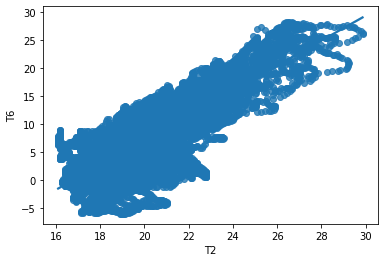

In [5]:
 # Assigning T2 as X and T6 as y
X = df['T2']
y = df['T6']
# linear regression plot
sns.regplot(x = "T2", y = "T6", data = df)

 R^2 value in two d.p

In [6]:
R2_value = r2_score(X, y)
round(R2_value, 2) 

-35.39

# Question 13

In [7]:
#removing the following columns: [“date”, “lights”]
df.drop(['date', 'lights'], axis=1, inplace=True)

In [8]:
# quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [9]:
# normalize the dataset using the MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# taking Appliances as target variable
X = df2.drop(columns=['Appliances'])
y = df2['Appliances']

In [11]:
# using a 70-30 train-test set split with a random state of 42
x_train, x_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [12]:
# multiple linear regression using the training set
linear_reg = LinearRegression().fit(x_train, y_train)

In [13]:
# evaluating model on the test set
y_pred = linear_reg.predict(x_test)

What is the Mean Absolute Error (in two decimal places)?

In [14]:
mae = mean_absolute_error(y_test, y_pred)
round(mae, 2) 

0.05

# Question 14

What is the Residual Sum of Squares (in two decimal places)?

In [15]:
rss = np.sum(np.square(y_test - y_pred))
round(rss, 2) 

45.35

# Question 15

What is the Root Mean Squared Error (in three decimal places)?

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse, 3) 

0.088

# Question 16

What is the Coefficient of Determination (in two decimal places)?

In [17]:
r2_score = r2_score(y_test, y_pred)
round(r2_score, 2)

0.15

# Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?`

In [18]:
# Obtaining the linear model weight for each feature
pd.Series(linear_reg.coef_, x_train.columns).sort_values()
linear_reg_weight_df = pd.DataFrame(pd.Series(linear_reg.coef_, x_train.columns).sort_values())

In [19]:
linear_reg_weight_df

,0
RH_2,-0.456698
T_out,-0.321860
T2,-0.236178
T9,-0.189941
RH_8,-0.157595
RH_out,-0.077671
RH_7,-0.044614
RH_9,-0.039800
T5,-0.015657
T1,-0.003281


In [20]:
# RH_2 and RH_1 have the lowest and highest weights respectively

# Question 18

In [21]:
# ridge regression model with an alpha value of 0.4
ridge_reg = Ridge(alpha = 0.4).fit(x_train, y_train)

In [22]:
# evaluating model on the test set
y_pred = ridge_reg.predict(x_test)

In [23]:
# root mean squared error
rmse_L2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_L2

0.08753385704628003

In [24]:
round(rmse_L2 - rmse, 3)

0.0

# Question 19

In [25]:
# lasso regression model with an alpha value of 0.001
lasso_reg = Lasso(alpha=0.001).fit(x_train, y_train)

In [26]:
# feature weights
pd.Series(lasso_reg.coef_, x_train.columns).sort_values()
lasso_reg_weight_df = pd.DataFrame(pd.Series(lasso_reg.coef_, x_train.columns).sort_values())

In [27]:
lasso_reg_weight_df

,0
RH_out,-0.049557
RH_8,-0.000110
T1,0.000000
Tdewpoint,0.000000
Visibility,0.000000
Press_mm_hg,-0.000000
T_out,0.000000
RH_9,-0.000000
T9,-0.000000
T8,0.000000


In [28]:
# features with non-zero feature weights
lasso_reg_weight_df.astype(bool).sum(axis=0)

0    4
dtype: int64

# Question 20

RMSE with the lasso regression

In [29]:
# evaluating model on the test set
y_pred = lasso_reg.predict(x_test)

In [30]:
# root mean squared error
rmse_L1 = np.sqrt(mean_squared_error(y_test, y_pred))
round(rmse_L1, 3)

0.094